#### Тема проекта
# Зависимость оценки аниме от его характеристик
#### Какие данные вы взяли для работы, укажите их источник
Я взяла набор данных, который предлагает всесторонний обзор лучших аниме 2024 года и полезен для создания систем рекомендаций, визуализации тенденций популярности аниме и их оценок, прогнозирования оценок и популярности.
[Источник](https://www.kaggle.com/datasets/bhavyadhingra00020/top-anime-dataset-2024)
#### Описание каждого признака:
1. _Score_ - рейтинг или оценка, присвоенная каждому названию аниме
2. _Popularity_ - место в рейтинге каждого аниме по популярности среди зрителей
3. _Rank_ - рейтинг каждого названия аниме в наборе данных
4. _Members_ - количество участников или зрителей, связанных с каждым аниме.
5. _Description_ - краткий обзор сюжета и тем каждого аниме
6. _Synonyms_ - альтернативные названия (синонимы), используемые для каждого аниме
7. _Japanese_ - оригинальное название аниме на японском языке
8. _English_ - переведенное на английский название аниме
9. _Type_ - классификация по типу аниме (например, телесериал, фильм, OVA и т.д.)
10. _Episodes_ - общее количество серий в каждом аниме-сериале
11. _Status_ - текущее состояние аниме (например, продолжается, завершено и т.д.)
12. _Aired_ - диапазон дат выхода аниме в эфир
13. _Premiered_ - дата первой премьеры аниме
14. _Broadcast_ - информация о платформе или канале вещания
15. _Producers_ - компании или студии, участвующие в производстве аниме
16. _Licensors_ - организации или компании, владеющие лицензионными правами на аниме.
17. _Studios_ - анимационные студии, ответственные за производство аниме
18. _Source_ - исходный материал для аниме (например, манга, роман, оригинал)
19. _Genres_ - категории или жанры, к которым относится аниме
20. _Demographic_ - целевая демографическая аудитория аниме (например, SeinenSeinen, ShoujoShoujo, ShounenShounen, JoseiJosei).
21. _Duration_ - продолжительность каждого эпизода или фильма
22. _Rating_ - возрастной рейтинг контента, присвоенный каждому аниме (например, G, PG, PG-13, R)

In [1]:
# Connecting all used libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler

In [2]:
# A function to create a new column ("Duration_in_minutes") based on the columns "Duration" and "Episodes"
def convert_to_minutes(row) -> int:
    duration = row['Duration']
    number_of_episodes = row['Episodes']
    time_parts = duration.split()
    if 'hr.' in duration:
        hours = int(time_parts[0])
        if 'min.' in duration:
            minutes = int(time_parts[2])
        else:
            minutes = 0
    else:
        hours = 0
        minutes = int(time_parts[0])
    return int(number_of_episodes * (hours * 60 + minutes))

In [3]:
# A function to calculate the number of seasons since Winter 1980 for new column "Premiere_age"

def calculate_seasons_since_1980(premiered):
    seasons = {'Winter': 1, 'Spring': 2, 'Summer': 3, 'Fall': 4}
    
    season, year = premiered.split(' ')
    year = int(year)
    years_since_1990 = year - 1980
    total_seasons = years_since_1990 * 4 + seasons[season] - 1  # Subtract 1 because Winter 1980 is the starting point.
    
    return total_seasons

In [4]:
# Preparing of the Pandas output and loading the dataset
pd.set_option('display.max_columns', 10)
pd.set_option('display.width', 250)
df = pd.read_csv("db_anime.csv")

# EDA. Разведочный анализ данных

In [5]:
# EDA. 1. How many rows and columns are there in the dataset?
rows, columns = df.shape
print(f'The dataset has {rows} rows and {columns} columns.')

The dataset has 1000 rows and 22 columns.


In [6]:
# EDA. 2. Find out the data type of each feature
data_types = df.dtypes
print("Data types of each feature:\n", data_types)

Data types of each feature:
 Score          float64
Popularity       int64
Rank             int64
Members          int64
Description     object
Synonyms        object
Japanese        object
English         object
Type            object
Episodes       float64
Status          object
Aired           object
Premiered       object
Broadcast       object
Producers       object
Licensors       object
Studios         object
Source          object
Genres          object
Demographic     object
Duration        object
Rating          object
dtype: object


# EDA. 3. Определите тип данных для каждого объекта с точки зрения анализа
- _Непрерывный_: Score, Duration;
- _Дискретный_: Popularity, Rank, Members, Episodes;
- _Номинальный_: Description, Synonyms, Japanese, English, Type, Status, Aired, Broadcast, Producers, Licensors, Studios, Source, Genres, Demographic;
- _Порядковый_: Premiered, Rating;

In [7]:
# EDA. 4. Are there gaps in the data?
missing_data = df.isnull().sum()
print("Missing data in each column:\n", missing_data)

# Handling missing data
# For numeric columns, we can fill missing values with the median (because it is numeric columns).
numeric_columns = ['Score', 'Popularity', 'Rank', 'Members', 'Episodes']
for column in numeric_columns:
    if df[column].isnull().sum() != 0:
        df[column].fillna(df[column].median(), inplace=True)
# For categorical columns, we can fill missing values with the mode.
categorical_columns = ['Description', 'Synonyms', 'Japanese', 'English', 'Type', 'Status', 'Aired', 'Premiered',
                       'Broadcast', 'Producers', 'Licensors', 'Studios', 'Source', 'Genres', 'Demographic', 'Duration',
                       'Rating']
for column in categorical_columns:
    if df[column].isnull().sum() != 0:
        df[column].fillna(df[column].mode()[0], inplace=True)

# Verify missing data handling
missing_data_after = df.isnull().sum()
print("Missing data after handling:\n", missing_data_after)

# Creating of new feature "Duration_in_minutes"
df['Duration_in_minutes'] = df.apply(convert_to_minutes, axis=1)
print(df['Duration_in_minutes'])

Missing data in each column:
 Score            0
Popularity       0
Rank             0
Members          0
Description      0
Synonyms       291
Japanese         1
English        141
Type             0
Episodes         3
Status           0
Aired            0
Premiered      431
Broadcast      431
Producers        0
Licensors        0
Studios          0
Source           0
Genres         229
Demographic    479
Duration         0
Rating           0
dtype: int64
Missing data after handling:
 Score          0
Popularity     0
Rank           0
Members        0
Description    0
Synonyms       0
Japanese       0
English        0
Type           0
Episodes       0
Status         0
Aired          0
Premiered      0
Broadcast      0
Producers      0
Licensors      0
Studios        0
Source         0
Genres         0
Demographic    0
Duration       0
Rating         0
dtype: int64
0       672
1      1536
2       576
3      1224
4       230
       ... 
995     119
996     120
997     110
998     116
99

C:\Users\Dmitriy\AppData\Local\Temp\ipykernel_4588\3857562978.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].median(), inplace=True)
C:\Users\Dmitriy\AppData\Local\Temp\ipykernel_4588\3857562978.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.


# Почему я использовала именно такие способы заполнения пропусков?
При работе с пропусками стратегия заполнения этих пропусков зависит от типа данных в столбце.
- __Числовые столбцы__: Для числовых столбцов я использую медиану для заполнения пропусков. Причина этого в том, что медиана менее чувствительна к выбросам или искаженным данным по сравнению со средним значением. Если у меня есть набор данных с несколькими чрезвычайно высокими или низкими значениями, это может существенно повлиять на среднее значение, но не так сильно на медиану. Поэтому заполнение пропущенных значений медианой часто может привести к более правильному вычислению.
- __Категориальные столбцы__: Для категориальных столбцов я использую моду для заполнения пропусков. Дело в том, что в таких столбцах нет “среднего” значения, как в числовых. Использование этого способа является простой и часто эффективной стратегией для заполнения пропусков в категориальных признаках, поскольку он представляет собой наиболее распространенный признак.

In [8]:
# EDA. 5. Are there outliers in the data?
# We'll use the IQR method to detect outliers

def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers


# Detect outliers in numeric columns
numeric_columns.append('Duration_in_minutes')
outliers = {}
for column in numeric_columns:
    outliers[column] = detect_outliers(df, column)
    print(f'Outliers in {column}:\n', outliers[column])

# Removing outliers
for column in numeric_columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[~((df[column] < lower_bound) | (df[column] > upper_bound))]

Outliers in Score:
     Score  Popularity  Rank  Members                                        Description  ...                                             Genres     Demographic         Duration                          Rating  Duration_in_minutes
0    9.38         284     1      710  During their decade-long quest to defeat the D...  ...     AdventureAdventure, DramaDrama, FantasyFantasy  ShounenShounen  24 min. per ep.       PG-13 - Teens 13 or older                  672
1    9.09           3     2        3  After a horrific alchemy experiment goes wrong...  ...  ActionAction, AdventureAdventure, DramaDrama, ...  ShounenShounen  24 min. per ep.  R - 17+ (violence & profanity)                 1536
2    9.07          13     3        2  Eccentric scientist Rintarou Okabe has a never...  ...         DramaDrama, Sci-FiSci-Fi, SuspenseSuspense  ShounenShounen  24 min. per ep.       PG-13 - Teens 13 or older                  576
3    9.06         342     4      630  Gintoki, Shinpachi, an

# С помощью каких критериев я определяю выбросы?

Я использую метод межквартильного разбиения (IQR). Это обычный статистический метод выявления отклонений с помощью вычисления IQR. IQR - это диапазон между первым и третьим квартилем данных (про квартили я объясняю ниже). Другими словами, IQR - это диапазон средних 50% данных.
> Первый квартиль (25%) - это значение, <u>ниже</u> которого находится <u>25%</u> отсортированных по данному признаку данных. Грубо говоря, значение, стоящее на границе между первой и второй четвертью отсортированных данных. К примеру, первый квартиль рейтинга студентов ВШЭ - 75 процентиль, потому что ниже данной отметки находится четверть всех студентов.
> Третий квартиль (75%) - это значение, <u>ниже</u> которого находится <u>75%</u> отсортированных по данному признаку данных. Возвращаясь к примеру с рейтингом студентов ВШЭ, это будет уже 25 процентиль, потому что ниже этой отметки находится 75% студентов.

Теперь о том, как я использую метод IQR для выявления отклонений от нормы.
1. Определяю нижнюю (lower_bound) и верхнюю (upper_bound) границу. Для вычисления нижней - вычитаю из первого квартиля (Q1) 1.5 * IQR, для вычисления верхней - к третьему квартилю (Q3) я прибавляю 1.5 * IQR.
2. Беру все значения, которые меньше нижней границы __или__ больше верхней. Это и будут наши выбросы. Для логического "или" я использую унарный оператор "|".

In [9]:
# EDA. 6. Calculate descriptive statistics for variables
descriptive_stats = df.describe()
print("Descriptive statistics:\n", descriptive_stats)

Descriptive statistics:
             Score   Popularity         Rank     Members    Episodes  Duration_in_minutes
count  812.000000   812.000000   812.000000  812.000000  812.000000           812.000000
mean     8.143067  1670.444581   506.306650  194.247537   10.389163           265.135468
std      0.259635  1461.475287   283.499948  191.581526    8.937309           194.547314
min      7.800000     1.000000    21.000000    1.000000    1.000000             2.000000
25%      7.920000   508.750000   264.500000   38.000000    1.000000           100.000000
50%      8.100000  1180.500000   498.500000  132.000000   12.000000           276.000000
75%      8.300000  2573.750000   749.500000  299.000000   13.000000           312.000000
max      8.900000  6075.000000  1000.000000  769.000000   38.000000           875.000000


In [10]:
# EDA. 7. Interpret descriptive statistics for one numeric attribute and for one categorical one.
# Numeric attribute: Score
print("Descriptive statistics for 'Score':\n", descriptive_stats['Score'])

# Categorical attribute: Type
type_counts = df['Type'].value_counts()
print("Descriptive statistics for 'Type':\n", type_counts)

Descriptive statistics for 'Score':
 count    812.000000
mean       8.143067
std        0.259635
min        7.800000
25%        7.920000
50%        8.100000
75%        8.300000
max        8.900000
Name: Score, dtype: float64
Descriptive statistics for 'Type':
 Type
TV            429
Movie         209
OVA            79
Special        37
ONA            36
TV Special     22
Name: count, dtype: int64


# Visualization. Визуализация. Постройте не менее трех графиков (причем, нужно использовать как минимум два типа визуализаций)

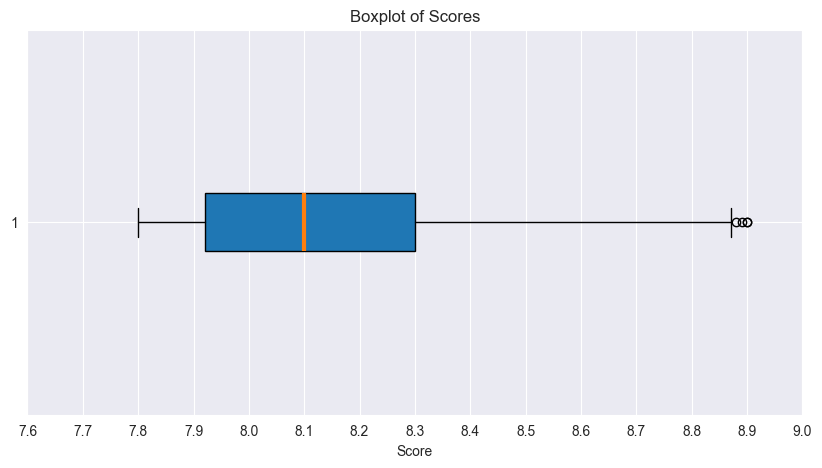

In [11]:
# Visualization. 1. Boxplot of Scores
plt.figure(figsize=(10, 5))
plt.boxplot(df['Score'], vert=False, patch_artist=True, medianprops={'linewidth': 3})
plt.title('Boxplot of Scores')
plt.xlabel('Score')

# Set x-ticks to increase grid divides
plt.xticks(np.arange(min(df['Score']) - 0.2, max(df['Score']) + 0.2, 0.1))  # Replace 'step_value' with the desired step size between grid lines

plt.grid(True)
plt.show()

## Вывод по визуализации 1
Видим, что медиана рейтинга выпадает практически на 8.1, половина данный попадает в промежуток рейтинга от 7.92 до 8.3, предполагаемый максимум по данной диаграмме ~ 8.87, предполагаемый минимум ~ 7.8

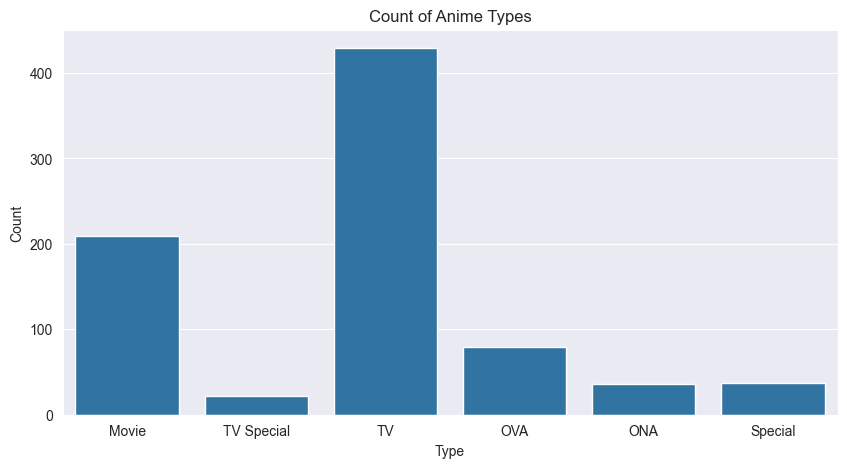

In [12]:
# Visualization. 2. Bar plot of Type counts
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Type')
plt.title('Count of Anime Types')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

## Вывод по визуализации 2
По данной диаграмме мы видим, что больше всего аниме (чуть меньше половины) показывается по TV, на втором месте - полнометражные аниме. Меньше всего аниме попадают под категорию TV Special 

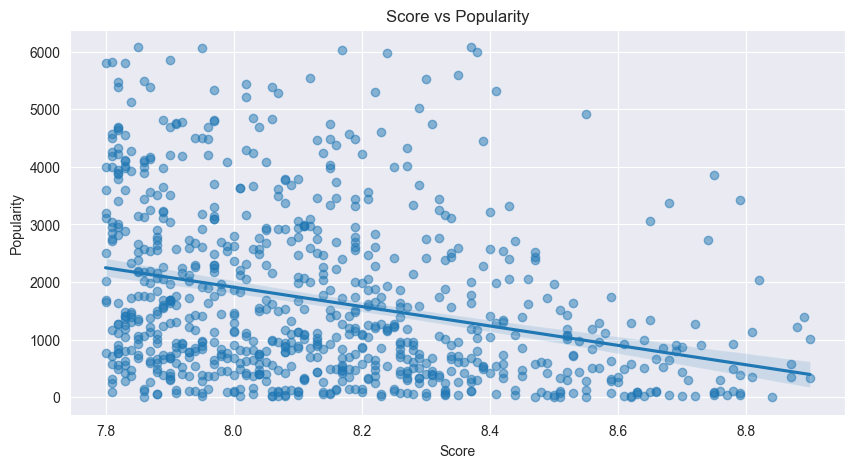

In [13]:
# Visualization. 3. Scatter plot of Score vs Popularity
plt.figure(figsize=(10, 5))
# Add a regression line
sns.regplot(data=df, x='Score', y='Popularity', scatter_kws={'alpha':0.5})
plt.title('Score vs Popularity')
plt.xlabel('Score')
plt.ylabel('Popularity')
plt.show()

## Вывод по визуализации 3
По этому графику можно увидеть зависимость рейтинга аниме от его популярности. Также построена линия регрессии. Она движется линейно и отрицательно, это значит, что с ростом популярности растёт и рейтинг аниме (и наоборот), что довольно логично. Такой вывод мы сделали, основываясь на том, что рейтинг увеличивается вдоль оси OX, а популярность <u>увеличивается против направления оси OY</u>.

# Correlation. Корреляция.
Постройте матрицу корреляций по количественным переменным и опишите зависимости, которые обнаружили 

Correlation matrix:
                         Score  Popularity      Rank   Members  Episodes  Duration_in_minutes
Score                1.000000   -0.299136 -0.964139  0.135705  0.087668             0.119575
Popularity          -0.299136    1.000000  0.298497 -0.533485 -0.290586            -0.297929
Rank                -0.964139    0.298497  1.000000 -0.144477 -0.094352            -0.127854
Members              0.135705   -0.533485 -0.144477  1.000000  0.095008             0.101568
Episodes             0.087668   -0.290586 -0.094352  0.095008  1.000000             0.967475
Duration_in_minutes  0.119575   -0.297929 -0.127854  0.101568  0.967475             1.000000


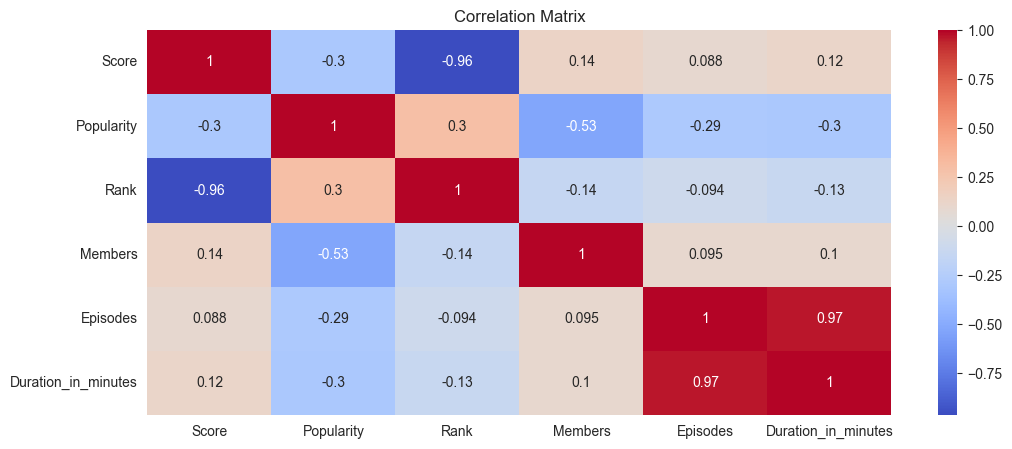

In [14]:
# Correlation. 1. Build a correlation matrix for quantitative variables
correlation_matrix = df[numeric_columns].corr()
print("Correlation matrix:\n", correlation_matrix)
plt.figure(figsize=(12, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

## Correlation. 2. Опишите зависимости, которые обнаружили
Были обнаружены следующие корреляции:
1. ___Слабая отрицательная___ между признаками _Score_ и _Popularity_. Эта корреляция была видна на этапе третьей визуализации. Объясняется это тем, что увеличение рейтинга аниме "привлекает" больше зрителей, что, впоследствии, влияет на дальнейший рейтинг. Он может как падать, так и возрастать, но в сумме, я считаю, он не сильно изменится, поэтому данная корреляция не сильная. 
2. ___Сильная отрицательная___ между признаками _Score_ и _Rank_. Это очевидно, потому что ранг - порядковый номер аниме в отсортированном по рейтингу списке.
3. ___Слабая положительная___ между признаками _Score_ и _Members_. Это означает, что с возрастанием рейтинга растёт и количество участников/зрителей, связанных с конкретным аниме.
4. ___Слабая положительная___ между признаками _Score_ и _Duration_in_minutes_. Это означает, что объем аниме по времени положительно влияет на рейтинг
5. ___Средняя отрицательная___ между признаками _Popularity_ и _Members_. Это логично, потому что с возрастанием популярности растёт и количество участников/зрителей, связанных с конкретным аниме.
6. ___Слабая отрицательная___ между признаками _Popularity_ и _Episodes_. Это означает, что с ростом количества серий (эпизодов) растёт и популярность аниме.
7. ___Слабая отрицательная___ между признаками _Popularity_ и _Duration_on_minutes_. Это означает, что с ростом объема аниме по времени растёт и популярность аниме.
8. В связи со второй корреляцией нет смысла объяснять корреляции между Rank и другими признаками, так как рассмотрены эти же корреляции, но с признаком Score. По этой же причине не рассматривалась слабая положительная корреляция между Popularity и Rank.
9. ___Сильная положительная___ между признаками _Episodes_ и _Duration_in_minutes_. Это очевидная корреляция, так как чем больше серий в аниме, тем оно объемнее по времени. Корреляция не равна единице, потому что существуют полнометражные аниме (из 1 эпизода), длительность которых примерно 1,5-2 часа. В таком случае полнометражные аниме будут иметь длительность в минутах больше, чем многосерийные аниме, количество эпизодов в которых меньше 5.

# Hypotheses. Тестирование гипотез
Реализуйте 3 из предложенных 5 гипотез на выбор

In [15]:
# Hypotheses. 1. "The average score of an anime is 7.5". 
# I use a z-test for mathematical expectation

print(f'Hypothesis: The average score of an anime is 7.5.\n'
      f'z-test was used')
alpha = 0.05
mean_score = df['Score'].mean()
std_score = df['Score'].std()
n = len(df['Score'])
z_score = (mean_score - 7.5) / (std_score / np.sqrt(n))
p_value = 2 * (1 - stats.norm.cdf(np.abs(z_score)))  # two-tailed test
if p_value < alpha:
    print(f"    Rejecting the null hypothesis, there is a significant difference.\n"
          f"    z_score = {z_score}, p_value = {p_value}")
else:
    print(f'    Do not reject the null hypothesis, there is no significant difference.\n'
          f'    z_score = {z_score}, p_value = {p_value}')

Hypothesis: The average score of an anime is 7.5.
z-test was used
    Rejecting the null hypothesis, there is a significant difference.
    z_score = 70.5782889421253, p_value = 0.0


#### Гипотеза оказалась неверной, p_value слишком мало, поэтому делаем вывод о том, что средняя оценка аниме по всему датасету далека от значения 7.5

In [16]:
# Hypotheses. 2. "The average score of anime with a high number of members is different from the overall average score".
# I use a t-test to check this hypothesis.

print(f'Hypothesis: The average score of anime with a high number of members is different from the overall average score.\n'
      f't-test was used')
alpha = 0.05

high_members_threshold = df['Members'].quantile(0.75)  # Top 25% of anime by number of members
high_members_df = df[df['Members'] > high_members_threshold]
overall_mean_score = df['Score'].mean()

t_stat, p_value = stats.ttest_1samp(high_members_df['Score'], overall_mean_score)

if p_value < alpha:
    print(f"    Rejecting the null hypothesis, there is a significant difference.\n"
          f"    t_stat = {t_stat}, p_value = {p_value}")
else:
    print(f"    Do not reject the null hypothesis, there is no significant difference."
          f"    t_stat = {t_stat}, p_value = {p_value}")

Hypothesis: The average score of anime with a high number of members is different from the overall average score.
t-test was used
    Rejecting the null hypothesis, there is a significant difference.
    t_stat = 2.787885691560172, p_value = 0.005814488166120818


#### Гипотеза оказалась неверной, p_value слишком мало, поэтому делаем вывод о том, что средняя оценка аниме с высоким показателем количества участников в нём, не сильно отличается от средней оценки аниме по всему датасету


In [17]:
# Hypotheses. 3. "The average score of TV series is different from movies". 
# I use a test for the equality of mathematical expectations of two samples 
print(f'Hypothesis: The average score of TV series is different from movies\n'
      f'Test for equality of means was used')
alpha = 0.05

tv_scores = df[df['Type'] == 'TV']['Score']
movie_scores = df[df['Type'] == 'Movie']['Score']
t_stat, p_value = stats.ttest_ind(tv_scores, movie_scores)

if p_value < alpha:
    print(f"    Rejecting the null hypothesis, there is a significant difference.\n"
          f"    t_stat = {t_stat}, p_value = {p_value}")
else:
    print(f"    Do not reject the null hypothesis, there is no significant difference.\n"
          f"    t_stat = {t_stat}, p_value = {p_value}")

Hypothesis: The average score of TV series is different from movies
Test for equality of means was used
    Do not reject the null hypothesis, there is no significant difference.
    t_stat = 1.3905721535713722, p_value = 0.16484157754588452


#### Гипотеза оказалась верной, p_value достаточное, чтобы сделать вывод о том, что средняя оценка многосерийного аниме, показанного по TV, отличается от средней оценки полнометражного аниме 

# Regression. Задача регрессии или классификации
Постройте линейную или логистическую регрессию и оцените качество модели. Сделайте выводы

In [38]:
# Regression. 1. Build a linear or logistic regression of at least 3 features

# Creating of column "Premiere_age" based on number of seasons since 1980 winter
df['Premiere_age'] = df['Premiered'].apply(calculate_seasons_since_1980)

# Predicting Score based on Popularity, Members, and Duration_in_minutes, Premiere_age
X = df[['Popularity', 'Members', 'Duration_in_minutes', 'Premiere_age']]
y = df['Score']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [19]:
# Regression. 2. Evaluate the quality of the model
y_pred = model.predict(X_test)

# Metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')
print(f'Mean Absolute Error: {mae}')

Mean Squared Error: 0.0619317367568502
R-squared: 0.06512963780738878
Mean Absolute Error: 0.2064483658355716


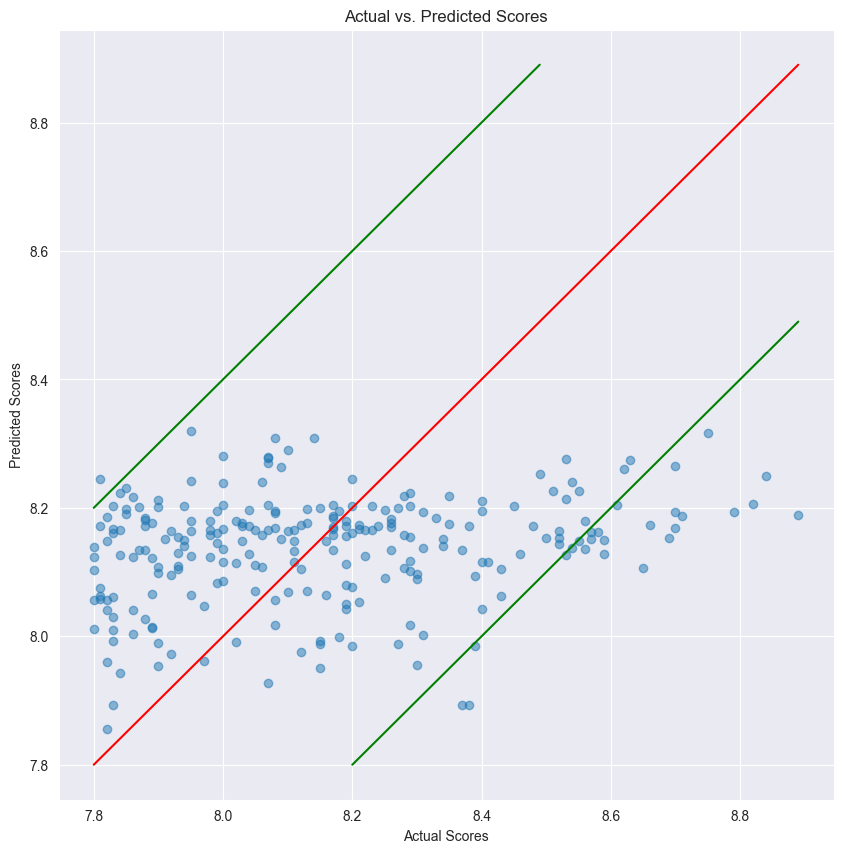

In [37]:
# Visualization of regression (optional)

# Predict the scores on the test set
y_pred = model.predict(X_test)

# Plot the actual vs predicted scores 
plt.figure(figsize=(10,10))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title('Actual vs. Predicted Scores')
plt.xlabel('Actual Scores')
plt.ylabel('Predicted Scores')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red') # A reference line
plt.plot([min(y_test) + 0.4, max(y_test)], [min(y_test), max(y_test) - 0.4], color='green') # A line below reference line 
plt.plot([min(y_test), max(y_test) - 0.4], [min(y_test) + 0.4, max(y_test)], color='green') # A line above reference line
plt.show()

# Regression. 3. Сделайте развернутые выводы

Ради удобства помимо оценки качества модели я сделала график, отражающий соответствие предсказанного рейтинга по нашей модели регрессии к реальному рейтингу. На нём на красной линии лежат те аниме, по которым предполагаемая оценка полностью совпала с реальной, чем дальше расположены точки от красной линии - тем меньше соответствие предположений с действительностью. Зелёные линии нарисованы так, что практически все точки расположены между ними. Зелёные линии - примерные границы разброса, нарисованные на расстоянии 0.4 от красной.  
По графику видим, что отклонения ожидаемых оценок аниме от действительных составляют примерно 0.8 (по 0.4 в каждую сторону)

#### Анализ оценок качества модели

1. Среднеквадратичная ошибка (MSE): MSE = 0,06388308040383955. Это среднее значение квадратов ошибок между прогнозируемыми значениями и фактическими значениями. __Значения, близкие к нулю, являются лучшими__. В нашем случае MSE относительно низкий, что говорит о том, что прогнозы нашей модели достаточно близки к истинным значениям.
2. Средняя абсолютная ошибка (MAE): MAE = 0,2096900287131602. Это средняя величина ошибок в наборе прогнозов без учета их направления. Это среднее значение по тестовой выборке абсолютных различий между прогнозами и фактическими наблюдениями, при котором все индивидуальные различия имеют одинаковый вес. __Значение MAE, близкие к нулю, являются лучшими__. В нашем случае MAE = 0,2097 относительно низкий, что говорит о том, что прогнозы нашей модели достаточно близки к истинным значениям.
3. R-квадрат (R-squared): R2 = 0,03567376530077104. Это статистический показатель того, насколько данные близки к заданной линии регрессии. Оно также известно как коэффициент детерминации или коэффициент множественной детерминации для множественной регрессии. Чем выше значение R2, тем лучше модель соответствует вашим данным. __Значения, близкие к единице, являются лучшими__. Наше значение 0,0357 является довольно низким, что указывает на то, что только около 3,57% вариабельности оценок аниме можно объяснить входными данными модели. 
 
#### По итогу, наша модель имеет низкие значения MSE и MAE, что отражает точность нашей модели, но значение R2 очень низкое, что говорит о том, что модель не объясняет большую часть различий в данных. Из выполнения текущего раздела работы можно сделать вывод, что выбранные признаки (популярность аниме, количество участников, длительность аниме, возраст премьеры) лишь немного влияют на оценку аниме экспертами. Было бы полезно изучить другие переменные, которые могли бы улучшить объяснительную способность модели. Однако на данный момент мы изучали зависимость рейтинга от количественных признаков, однако существует еще много номинальных характеристик аниме, которые могут значительно влиять на оценку, однако это уже не количественные признаки, поэтому мы редко их рассматривали и не строили модель регрессии относительно них.